In [1]:
from keras.models import load_model

model=load_model('C:/Users/HP/Downloads/cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 15, 15, 128)       1

In [2]:
img_path='C:/Users/HP/Downloads/pets/train/Cat/2571.jpg'

from keras.preprocessing import image
import numpy as np

img=image.load_img(img_path, target_size=(150, 150))
img_tensor=image.img_to_array(img)
img_tensor=np.expand_dims(img_tensor, axis=0)

img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


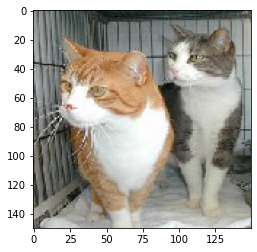

In [3]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [4]:
from keras import models

layer_outputs=[layer.output for layer in model.layers[:8]]
activation_model=models.Model(inputs=model.input, outputs=layer_outputs)

In [5]:
activations=activation_model.predict(img_tensor)

In [6]:
first_layer_activation=activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


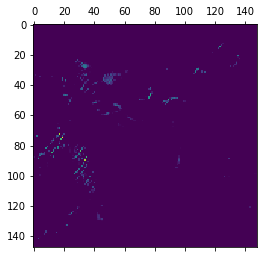

In [7]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

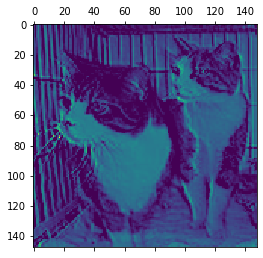

In [8]:
plt.matshow(first_layer_activation[0, :, :, 30], cmap='viridis')
plt.show()

<ipython-input-9-832beed62871>:24: RuntimeWarning: invalid value encountered in true_divide
  channel_image /=channel_image.std()


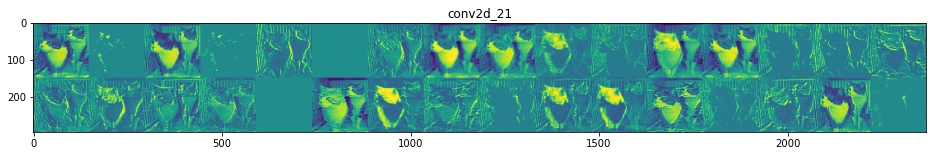

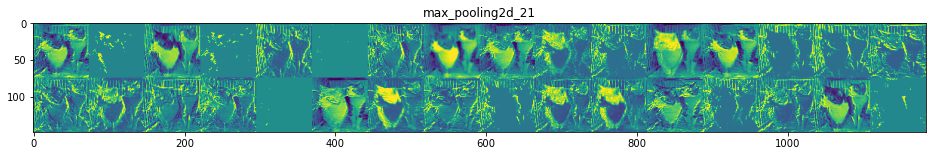

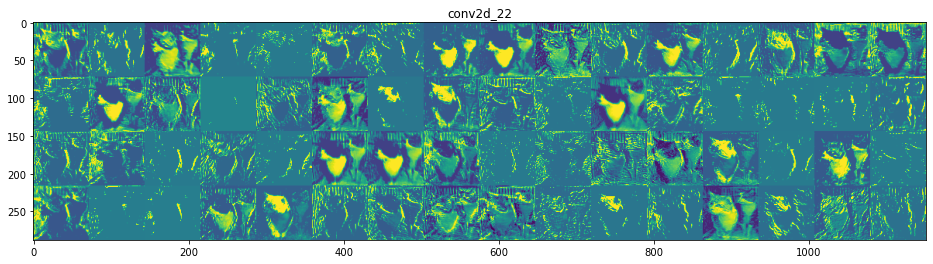

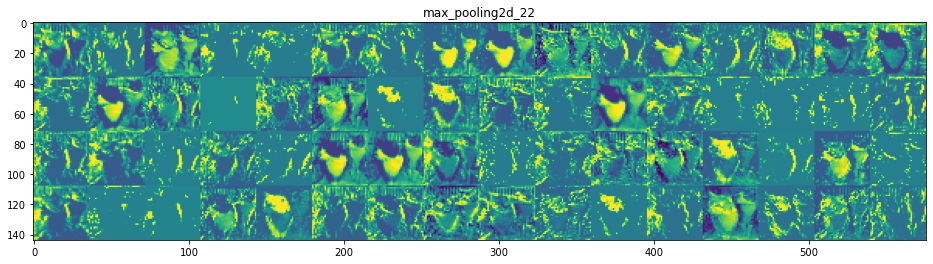

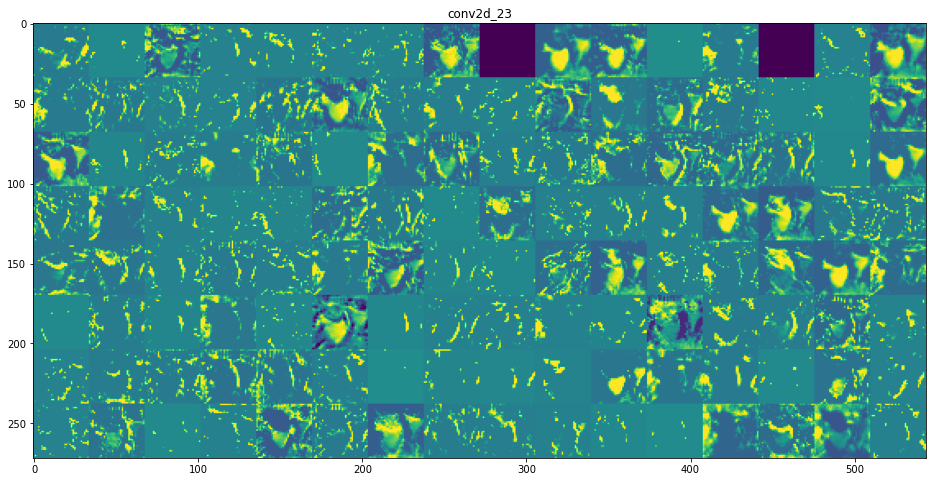

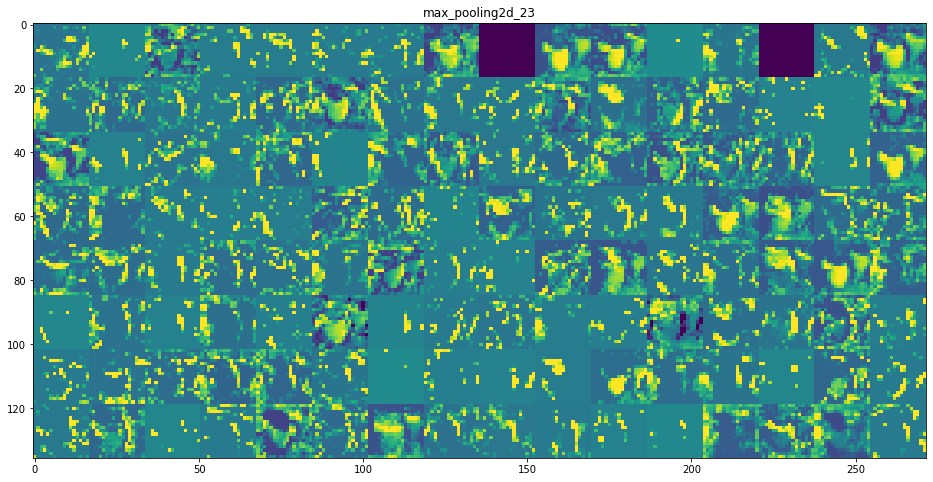

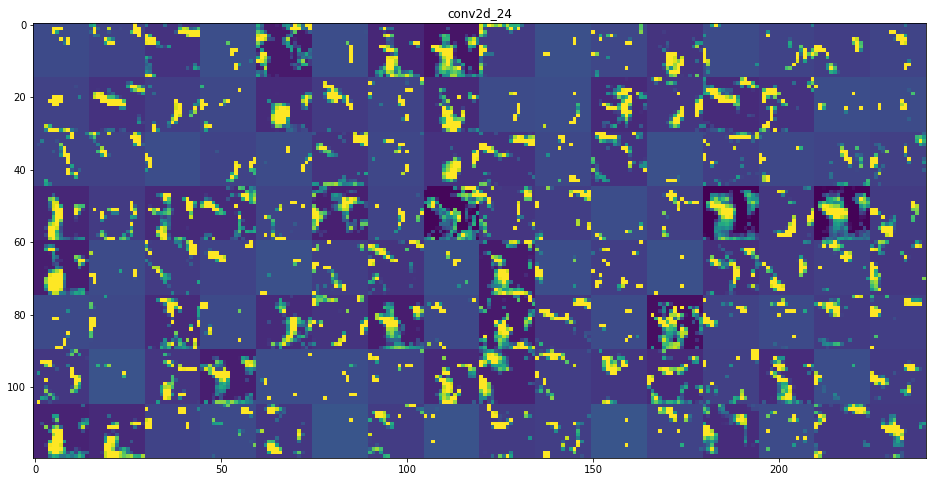

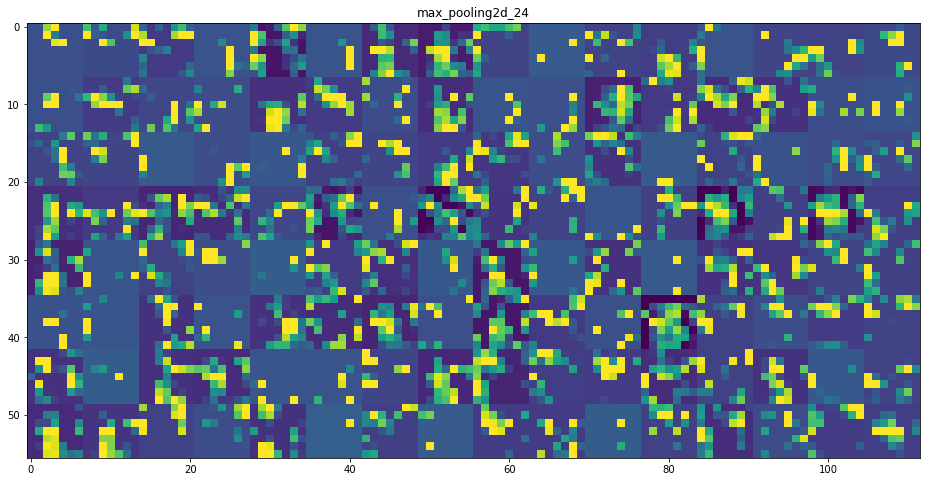

In [9]:
import keras 

layer_names=[]
for layer in model.layers[:8]:
  layer_names.append(layer.name)

images_per_row=16

for layer_name, layer_activation in zip(layer_names, activations):
  n_features=layer_activation.shape[-1]

  size=layer_activation.shape[1]

  n_cols=n_features // images_per_row
  display_grid=np.zeros((size * n_cols, images_per_row * size))

  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image=layer_activation[0,
                                     :, :,
                                     col * images_per_row + row]

      channel_image -=channel_image.mean()
      channel_image /=channel_image.std()
      channel_image *=64
      channel_image +=128
      channel_image =np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[col * size : (col + 1) * size,
                   row * size : (row + 1) * size]= channel_image

  scale=1. / size
  plt.figure(figsize=(scale * display_grid.shape[1],
                      scale * display_grid.shape[0]))
  
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()
